In [2]:
import torch
torch.__version__

'1.9.0'

In [18]:
import numpy as np
arr_1_d = np.asarray([1])
#print(arr_1_d)

arr_2_d = np.asarray([[1, 2], [3, 4]])
#print(arr_2_d)
#print(arr_2_d.reshape(1,4))

interest_score = np.random.randint(10, size=(4, 3))
#print(interest_score)
#print(np.sum(interest_score, axis=0))
#print(np.sum(interest_score, axis=1))

a = np.arange(18).reshape(3,2,3)
print(a)

print(a.max(axis=0))
print(a.max(axis=1))
print(a.max(axis=2))

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]]]
[[12 13 14]
 [15 16 17]]
[[ 3  4  5]
 [ 9 10 11]
 [15 16 17]]
[[ 2  5]
 [ 8 11]
 [14 17]]


(-0.5, 317.5, 115.5, -0.5)

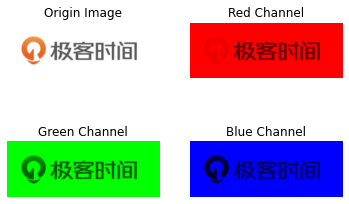

In [17]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

im = Image.open('/Users/xz/Downloads/test.webp')
im.size

im_pillow = np.asarray(im)
im_pillow.shape

im_pillow_c1 = im_pillow[:,:,0]
im_pillow_c2 = im_pillow[:,:,1]
im_pillow_c3 = im_pillow[:,:,2]

im_pillow_c1_3ch = np.zeros(im_pillow.shape)
im_pillow_c1_3ch[:,:,0] = im_pillow_c1
im_pillow_c2_3ch = np.zeros(im_pillow.shape)
im_pillow_c2_3ch[:,:,1] = im_pillow_c2
im_pillow_c3_3ch = np.zeros(im_pillow.shape)
im_pillow_c3_3ch[:,:,2] = im_pillow_c3

plt.subplot(2, 2, 1)
plt.title('Origin Image')
plt.imshow(im_pillow)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.title('Red Channel')
plt.imshow(im_pillow_c1_3ch.astype(np.uint8))
plt.axis('off')
plt.subplot(2, 2, 3)
plt.title('Green Channel')
plt.imshow(im_pillow_c2_3ch.astype(np.uint8))
plt.axis('off')
plt.subplot(2, 2, 4)
plt.title('Blue Channel')
plt.imshow(im_pillow_c3_3ch.astype(np.uint8))
plt.axis('off')


In [20]:
import numpy as np

probs = np.array([0.075, 0.15, 0.075, 0.15, 0.0, 0.05, 0.05, 0.2, 0.25])

np.argmax(probs)

probs_idx_sort = np.argsort(-probs) 
#注意，加了负号，是按降序排序
probs_idx_sort

array([8, 7, 1, 3, 0, 2, 5, 6, 4])

In [24]:
import torchvision
mnist_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                            transform=None,
                                            target_transform=None,
                                            download=True)

mnist_dataset_list = list(mnist_dataset)
# print(mnist_dataset_list)

display(mnist_dataset_list[0][0])
print("Image label is:", mnist_dataset_list[0][1])

Image label is: 5


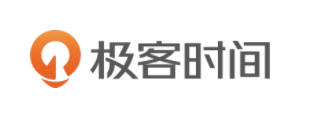

<class 'PIL.WebPImagePlugin.WebPImageFile'>
<class 'torch.Tensor'>
<class 'PIL.Image.Image'>


"\n输出: \n<class 'PIL.Image.Image'>\n"

In [27]:

from PIL import Image
from torchvision import transforms 



img = Image.open('/Users/xz/Downloads/test.jpg') 
display(img)
print(type(img)) # PIL.Image.Image是PIL.JpegImagePlugin.JpegImageFile的基类
'''
输出: 
<class 'PIL.JpegImagePlugin.JpegImageFile'>
'''

# PIL.Image转换为Tensor
img1 = transforms.ToTensor()(img)
print(type(img1))
'''
输出: 
<class 'torch.Tensor'>
'''

# Tensor转换为PIL.Image
img2 = transforms.ToPILImage()(img1)  #PIL.Image.Image
print(type(img2))
'''
输出: 
<class 'PIL.Image.Image'>
'''

In [29]:
# Visdom模型可视化监控
from visdom import Visdom
import random
import numpy as np
import time
import torch
from torch import nn

# 模型定义
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1))
    self.bias = nn.Parameter(torch.randn(1))

  def forward(self, input):
    return (input * self.weight) + self.bias

# 数据
w = 2
b = 3
xlim = [-10, 10]
x_train = np.random.randint(low=xlim[0], high=xlim[1], size=30)
y_train = [w * x + b + random.randint(0,2) for x in x_train]

# 训练
model = LinearModel()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, weight_decay=1e-2, momentum=0.9)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(0)

# 实例化一个窗口
viz = Visdom(port=8097)
# 初始化窗口的信息
viz.line([0.], [0.], win='train_loss', opts=dict(title='train loss'))

for n_iter in range(500):
    input = torch.from_numpy(x_train)
    output = model(input)
    loss = nn.MSELoss()(output, y_train)
    model.zero_grad()
    loss.backward()
    optimizer.step()
    # 更新监听的信息
    viz.line([loss.item()], [n_iter], win='train_loss', update='append')


Setting up a new session...


In [32]:
import random
import numpy as np
import torch
from torch import nn

# 模型定义
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1))
    self.bias = nn.Parameter(torch.randn(1))

  def forward(self, input):
    return (input * self.weight) + self.bias

# 数据
w = 2
b = 3
xlim = [-10, 10]
x_train = np.random.randint(low=xlim[0], high=xlim[1], size=30)
y_train = [w * x + b + random.randint(0,2) for x in x_train]

# 加入SummaryWriter实例与add_scalar方法
# Tensorboard
from torch.utils.tensorboard import SummaryWriter

# 训练
model = LinearModel()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, weight_decay=1e-2, momentum=0.9)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(0)

writer = SummaryWriter()

for n_iter in range(500):
    input = torch.from_numpy(x_train)
    output = model(input)
    loss = nn.MSELoss()(output, y_train)
    model.zero_grad()
    loss.backward()
    optimizer.step()
    writer.add_scalar('Loss/train', loss, n_iter)